Question
1. What to do when first get a data set? 
2. how do we know what to look at? what are some steps to take to learn about the data?
3. How do we deal with outliers (skewed data)
4. what are some other analysis/plots/features that you found useful when exploring data?

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [3]:
df = pd.read_pickle('../data/SeoulBikeData.pkl')

In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
Date                     8760 non-null object
Rented Bike Count        8760 non-null int64
Hour                     8760 non-null int64
Temperature              8760 non-null float64
Humidity                 8760 non-null int64
Wind speed               8760 non-null float64
Visibility               8760 non-null int64
Dew point temperature    8760 non-null float64
Solar Radiation          8760 non-null float64
Rainfall                 8760 non-null float64
Snowfall                 8760 non-null float64
Seasons                  8760 non-null object
Holiday                  8760 non-null object
Functioning Day          8760 non-null object
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ KB


In [6]:
df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [9]:
df.shape

(8760, 14)

In [10]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity', 'Wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning Day'], dtype='object')

In [11]:
df.columns = df.columns.str.replace(' ', '_')

In [12]:
df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'], dtype='object')

In [13]:
cat_col = ['Seasons', 'Holiday', 'Functioning_Day']

In [14]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [15]:
print('date range:', df['Date'].min(), '-', df['Date'].max())

date range: 2017-01-12 00:00:00 - 2018-12-11 00:00:00


In [16]:
non_str_col = df.describe().columns

In [17]:
non_str_col

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall'], dtype='object')

# Univariate Analysis

In [96]:
np.round(df.describe(), 3)

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,yr,mon
count,8760.000,8760.000,8760.000,8760.000,8760.000,8760.000,8760.000,8760.000,8760.000,8760.000,8760.000,8760.000
mean,704.602,11.500,12.883,58.226,1.725,1436.826,4.074,0.569,0.149,0.075,2017.915,6.526
std,644.997,6.923,11.945,20.362,1.036,608.299,13.060,0.869,1.128,0.437,0.279,3.448
min,0.000,0.000,-17.800,0.000,0.000,27.000,-30.600,0.000,0.000,0.000,2017.000,1.000
25%,191.000,5.750,3.500,42.000,0.900,940.000,-4.700,0.000,0.000,0.000,2018.000,4.000
50%,504.500,11.500,13.700,57.000,1.500,1698.000,5.100,0.010,0.000,0.000,2018.000,7.000
75%,1065.250,17.250,22.500,74.000,2.300,2000.000,14.800,0.930,0.000,0.000,2018.000,10.000
max,3556.000,23.000,39.400,98.000,7.400,2000.000,27.200,3.520,35.000,8.800,2018.000,12.000


In [19]:
def plt_hist(col):
    f, axes = plt.subplots(1, 2, figsize=(10, 4))
    f.tight_layout()
    sns.distplot(df[col], ax=axes[0])
    sns.boxplot(df[col], orient='v', ax=axes[1])
    plt.show()

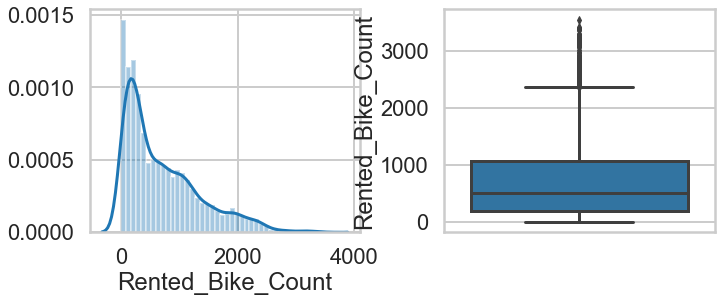

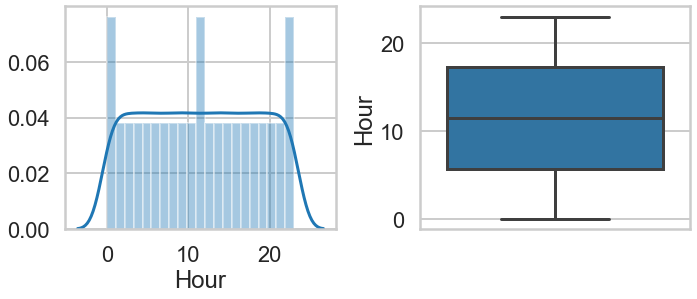

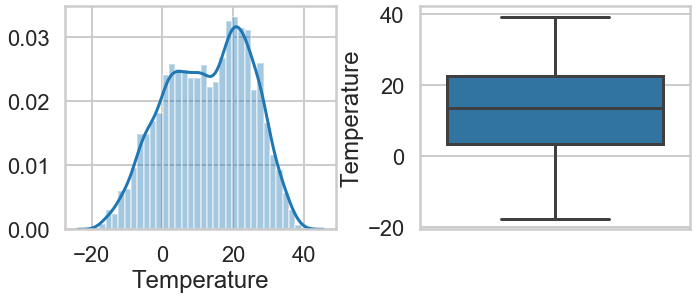

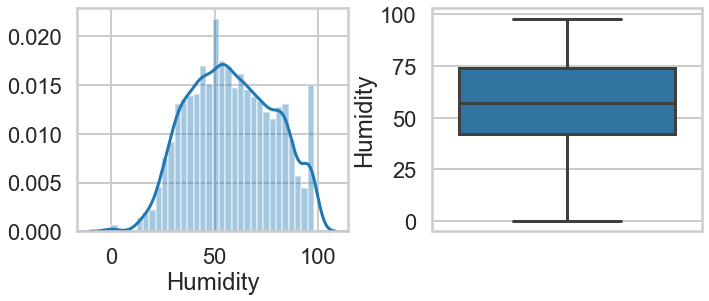

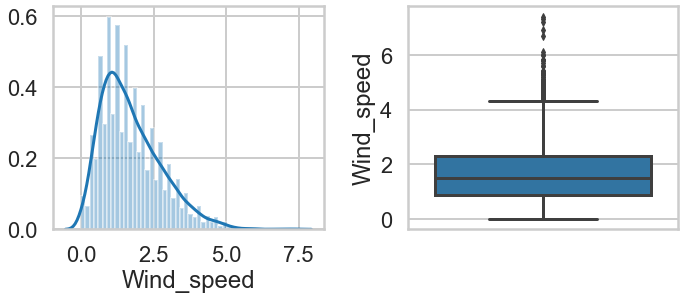

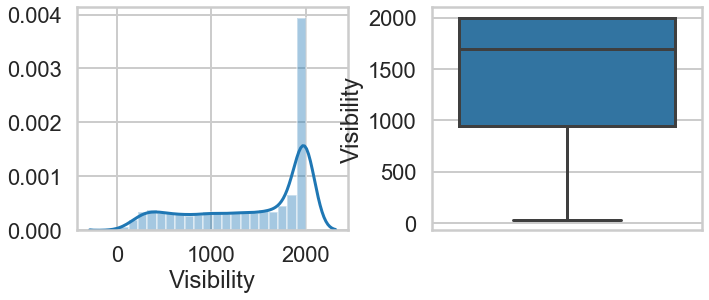

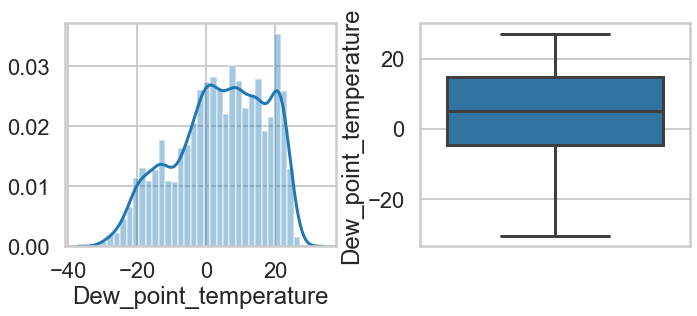

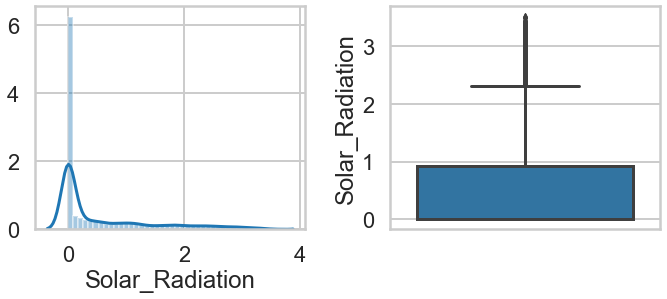

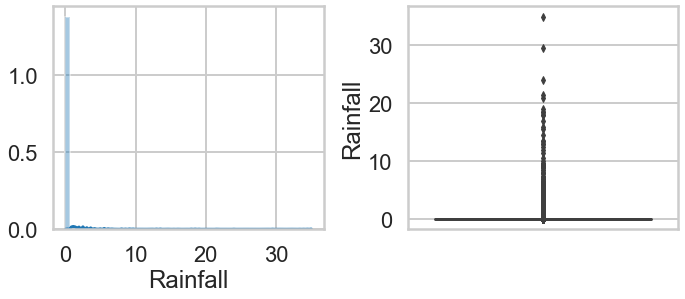

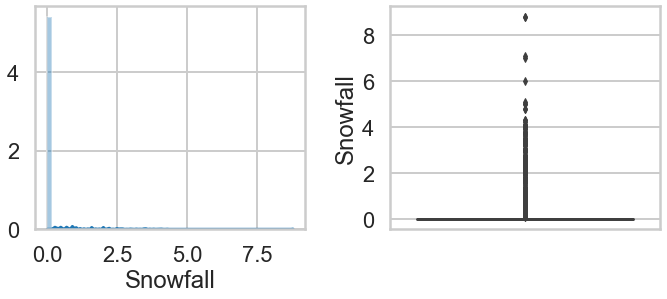

In [20]:
for col in non_str_col:
    plt_hist(col)

In [122]:
cat_col

['Seasons', 'Holiday', 'Functioning_Day']

In [114]:
cat_df = df.select_dtypes(include=['object', 'datetime', 'integer']).copy()
cat_df = cat_df.drop(['Humidity', 'Visibility'], axis=1)
cat_df = cat_df.sort_values(['Date', 'Hour'])
cat_df.tail()

,Date,Rented_Bike_Count,Hour,Seasons,Holiday,Functioning_Day,yr,mon
8323,2018-12-11,1466,19,Autumn,No Holiday,Yes,2018,12
8324,2018-12-11,1292,20,Autumn,No Holiday,Yes,2018,12
8325,2018-12-11,1189,21,Autumn,No Holiday,Yes,2018,12
8326,2018-12-11,1023,22,Autumn,No Holiday,Yes,2018,12
8327,2018-12-11,702,23,Autumn,No Holiday,Yes,2018,12


In [113]:
pd.crosstab(index=cat_df['Holiday'], columns='count')

col_0,count
Holiday,
Holiday,432
No Holiday,8328


In [112]:
pd.crosstab(index=cat_df['Functioning_Day'], columns='count')

col_0,count
Functioning_Day,
No,295
Yes,8465


In [115]:
pd.crosstab(index=cat_df['Seasons'], columns='count')

col_0,count
Seasons,
Autumn,2184
Spring,2208
Summer,2208
Winter,2160


# Bivariate Analysis

In [60]:
df['yr'] = df['Date'].dt.year
df['mon'] = df['Date'].dt.month

In [63]:
# Time series
def plt_time_series(col):
    plt.title(col)
    plt.xlabel('Date')
    plt.ylabel(col)
    tmp = df[df['yr']==2018].groupby('Date')[col].sum()
    plt.plot(tmp.index, tmp)
    plt.show()

In [67]:
df[df['yr']==2018].Date.nunique()

334

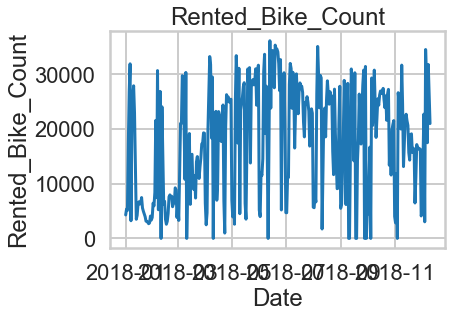

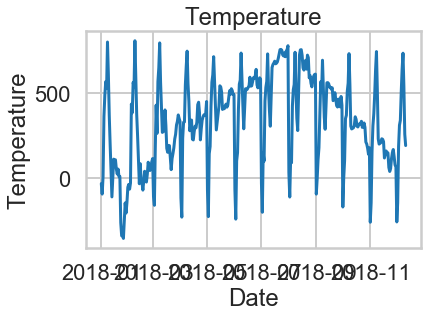

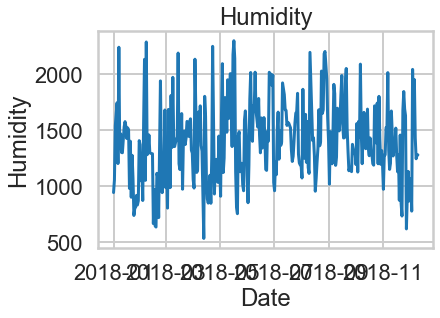

In [69]:
df = df.sort_values('Date')
for col in ['Rented_Bike_Count', 'Temperature', 'Humidity']:
    plt_time_series(col)

In [95]:
len(non_str_col)

10

In [70]:
non_str_col

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall'], dtype='object')

In [73]:
df[['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility']].corr()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility
Rented_Bike_Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753
Temperature,0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794
Humidity,-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090
Wind_speed,0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507
Visibility,0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000


In [93]:
def scatter_plt(col):
    sns.lmplot(col, 'Rented_Bike_Count', data=df)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    plt.show()

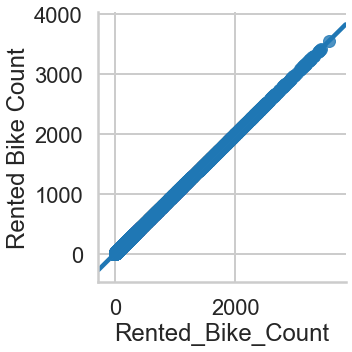

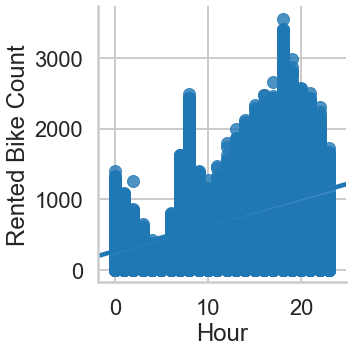

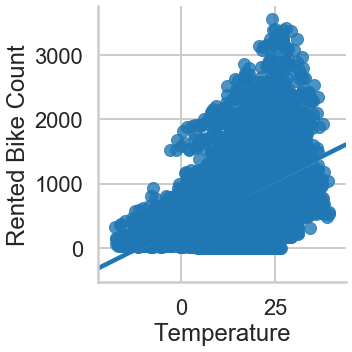

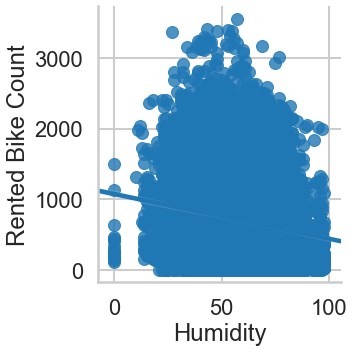

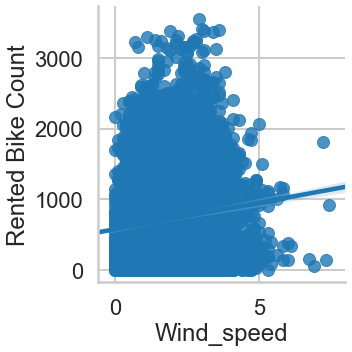

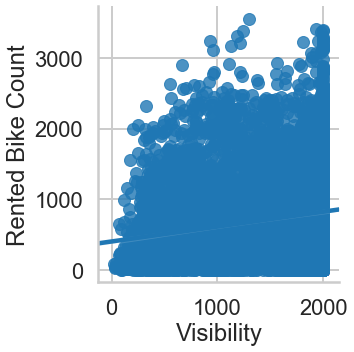

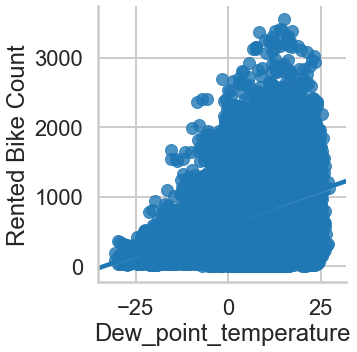

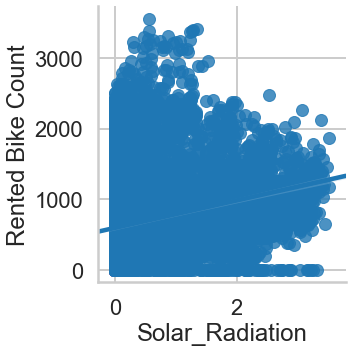

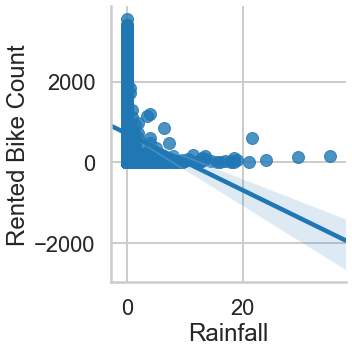

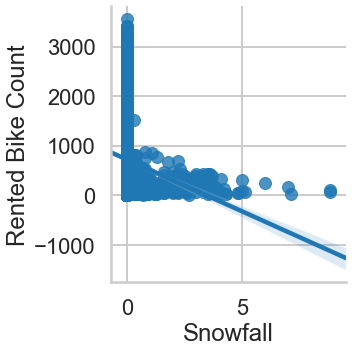

In [94]:
for col in non_str_col:
    if col == 'Rented_Bike_Count':
        pass
    scatter_plt(col)